In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [3]:
df=pd.read_csv("data/df_clean2.csv")
df.head()

,DRNumber,DateOccurred,TimeOccurred,AreaID,AreaName,CrimeCode,CrimeCodeDescription,VictimAge,VictimSex,VictimDescent,Location,NewCrimeCategory,Violent_NonViolent
0,1208575,03/11/2013,1800,12,77th Street,626,INTIMATE PARTNER - SIMPLE ASSAULT,30.0,F,W,"(33.9829, -118.3338)",ASSAULT AND BATTERY,VIOLENT
1,121801608,01/01/2013,500,18,Southeast,626,INTIMATE PARTNER - SIMPLE ASSAULT,19.0,F,H,"(33.9456, -118.2652)",ASSAULT AND BATTERY,VIOLENT
2,130100508,01/02/2013,1430,1,Central,626,INTIMATE PARTNER - SIMPLE ASSAULT,39.0,F,H,"(34.0503, -118.2504)",ASSAULT AND BATTERY,VIOLENT
3,130100518,01/05/2013,100,1,Central,626,INTIMATE PARTNER - SIMPLE ASSAULT,34.0,F,H,"(34.045, -118.264)",ASSAULT AND BATTERY,VIOLENT
4,130100521,01/05/2013,1600,1,Central,626,INTIMATE PARTNER - SIMPLE ASSAULT,50.0,F,B,"(34.0423, -118.2452)",ASSAULT AND BATTERY,VIOLENT


## Converting the type of Time Occurred to Date time

In [4]:
df["DateOccurred"]=pd.to_datetime(df["DateOccurred"])
type(df["DateOccurred"][0])

pandas._libs.tslibs.timestamps.Timestamp

## ploting some line graphes showing crime rate vs year

Text(0.5,1,'crime rate vs year of individual areas')

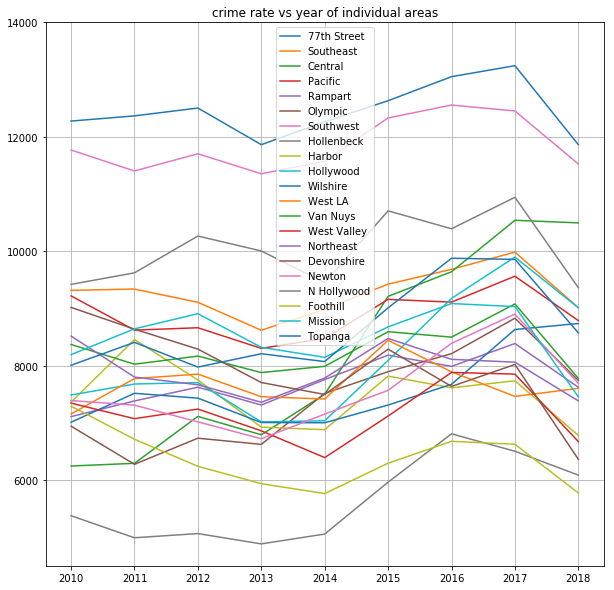

In [5]:
#import seaborn as sns

plt.figure(figsize=(10,10))
AreaName=df["AreaName"].unique().tolist()
df["YearOccurred"]=df["DateOccurred"].dt.year
for Area in AreaName:
    a=df.loc[df["AreaName"] == Area]
    #print(a.columns)
    
    df_year=a.groupby("YearOccurred")["DRNumber"].count()#.sort_values(ascending=True).reset_index()
    #print(a_year.index.values, a_year['DRNumber'])
    plt.plot(df_year.index.values, df_year.values, linestyle='-',label=Area)
    plt.legend()
plt.grid()
plt.ylim(4500,14000)
plt.title("crime rate vs year of individual areas")

Text(0.5,1,'crime rate vs year for 3 top safest and 3 least safe areas ')

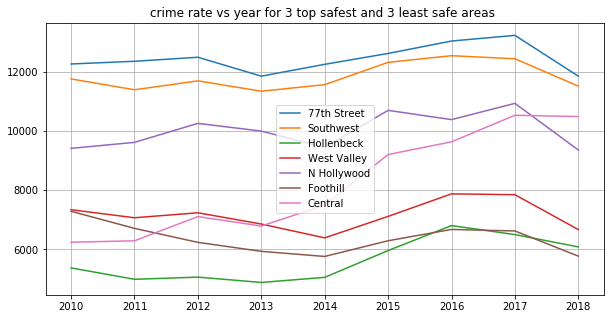

In [6]:
#import seaborn as sns

plt.figure(figsize=(10,5))
#AreaName=df["AreaName"].unique().tolist()
AreaName=['77th Street',  
        'Southwest', 'Hollenbeck',
         'West Valley',
       'N Hollywood', 'Foothill',"Central"
       ]
df["YearOccurred"]=df["DateOccurred"].dt.year
for Area in AreaName:
    a=df.loc[df["AreaName"] == Area]
    #print(a.columns)
    
    df_year=a.groupby("YearOccurred")["DRNumber"].count()#.sort_values(ascending=True).reset_index()
    #print(a_year.index.values, a_year['DRNumber'])
    plt.plot(df_year.index.values, df_year.values, linestyle='-',label=Area)
    plt.legend()
plt.grid()
plt.title("crime rate vs year for 3 top safest and 3 least safe areas ")

In [ ]:
df.columns

## Bar charts : comparing the crime rate of LA areas. Safest and most dangerous neighborhood in LA?

In [ ]:
barchart=df.groupby("AreaName").count()
barchart=barchart.sort_values(by="NewCrimeCategory",ascending=False)
plt.bar(barchart.index,barchart.NewCrimeCategory)
plt.xticks(rotation ="vertical")
plt.grid()
plt.title("LA areas Crime rate from 2010 to 2017")
plt.ylim(0,115000)

## How much has crime rate of LA areas changed over the past 8 years?

In [ ]:
barchart=df.loc[df["YearOccurred"]==2010,["AreaName",'NewCrimeCategory']].groupby("AreaName").count()
barchart=barchart.sort_values(by="AreaName",ascending=False)
plt.bar(barchart.index,barchart.NewCrimeCategory)
plt.xticks(rotation ="vertical")
plt.grid()
plt.title("LA areas Crime rate in 2010")
plt.ylim(0,13500)

In [ ]:
barchart=df.loc[df["YearOccurred"]==2015,["AreaName",'NewCrimeCategory']].groupby("AreaName").count()
barchart=barchart.sort_values(by="AreaName",ascending=False)
plt.bar(barchart.index,barchart.NewCrimeCategory)
plt.xticks(rotation ="vertical")
plt.grid()
plt.title("LA areas Crime rate in 2015")
plt.ylim(0,13500)

In [ ]:
barchart=df.loc[df["YearOccurred"]==2017,["AreaName",'NewCrimeCategory']].groupby("AreaName").count()
barchart=barchart.sort_values(by="AreaName",ascending=False)
plt.bar(barchart.index,barchart.NewCrimeCategory)
plt.xticks(rotation ="vertical")
plt.grid()
plt.title("LA areas Crime rate in 2017")
plt.ylim(0,13500)

## Let's practice some BOXPLOT : crime rate variation of LA areas?

In [ ]:
Boxplot=pd.DataFrame(df.groupby(["AreaName","YearOccurred"])["AreaID"].value_counts())

Boxplot=Boxplot.rename({"AreaID":"TotalCrime"},axis=1)
Boxplot.reset_index().head()

In [ ]:
import scipy.stats as stats
Boxplot.boxplot("TotalCrime", by="AreaName", figsize=(10, 10))
plt.xticks(rotation="vertical")

## 3.	Which categories have the highest rates of crime? Does it change by neighborhood?

In [ ]:
Central=pd.DataFrame(df.loc[df["AreaName"] == "Central","NewCrimeCategory"].value_counts()).reset_index()
plt.pie(Central["NewCrimeCategory"],labels=Central["index"],autopct='%1.1f%%')
plt.title("Central")
plt.figure()
Southwest=pd.DataFrame(df.loc[df["AreaName"] == "Southwest","NewCrimeCategory"].value_counts()).reset_index()
plt.pie(Southwest["NewCrimeCategory"],labels=Southwest["index"],autopct='%1.1f%%')
plt.title("Southwest")
plt.figure()
loc_77=pd.DataFrame(df.loc[df["AreaName"] == "77th Street","NewCrimeCategory"].value_counts()).reset_index()
type(loc_77)
plt.pie(loc_77["NewCrimeCategory"],labels=loc_77["index"],autopct='%1.1f%%')
plt.title("77 street")
plt.figure()
Hollenbeck=pd.DataFrame(df.loc[df["AreaName"] == "Hollenbeck","NewCrimeCategory"].value_counts()).reset_index()

plt.pie(Hollenbeck["NewCrimeCategory"],labels=Hollenbeck["index"],autopct='%1.1f%%')
plt.title("Hollnbeck")

## 5.	Are there different trends between violent and non-violent crimes?

In [ ]:
Central=pd.DataFrame(df.loc[df["AreaName"] == "Central","Violent_NonViolent"].value_counts()).reset_index()
plt.pie(Central["Violent_NonViolent"],labels=Central["index"],autopct='%1.1f%%')
plt.title("Central")
plt.figure()
Southwest=pd.DataFrame(df.loc[df["AreaName"] == "Southwest","Violent_NonViolent"].value_counts()).reset_index()
plt.pie(Southwest["Violent_NonViolent"],labels=Southwest["index"],autopct='%1.1f%%')
plt.title("Southwest")
plt.figure()
loc_77=pd.DataFrame(df.loc[df["AreaName"] == "77th Street","Violent_NonViolent"].value_counts()).reset_index()
type(loc_77)
plt.pie(loc_77["Violent_NonViolent"],labels=loc_77["index"],autopct='%1.1f%%')
plt.title("77 sctreet")
plt.figure()
Hollenbeck=pd.DataFrame(df.loc[df["AreaName"] == "Hollenbeck","Violent_NonViolent"].value_counts()).reset_index()

plt.pie(Hollenbeck["Violent_NonViolent"],labels=Hollenbeck["index"],autopct='%1.1f%%')
plt.title("Hollenbeck")

In [ ]:
df.head()


In [ ]:
print(df["VictimDescent"].unique())
df.groupby("VictimDescent")["DRNumber"].count().sort_values(ascending=False)

Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

### Summary data on ethnicity and victimization : are all the ethnic groups equally likely victim?

In [ ]:
df_Descent=pd.DataFrame(df.groupby("VictimDescent")["NewCrimeCategory"].value_counts())

df_Descent=df_Descent.rename({"NewCrimeCategory":"Counts"},axis=1).reset_index()
print()
for i in range(0,len(df_Descent["VictimDescent"])):
    if (df_Descent['VictimDescent'][i] != "H" ) & (df_Descent['VictimDescent'][i] != "W" ) & (df_Descent['VictimDescent'][i] != "B") & (df_Descent['VictimDescent'][i] != "A" )  & (df_Descent['VictimDescent'][i] != "A" ) :
        df_Descent.iloc[i, df_Descent.columns.get_loc('VictimDescent')] = "other"
        
df_Descent.head(5)       

In [ ]:
df_Descent_total=pd.DataFrame(df_Descent.groupby("VictimDescent")["Counts"].sum())
print(df_Descent_total)
print(df_Descent_total.index)
plt.pie(df_Descent_total["Counts"],labels=["Asian","Black","Hispanic/Latin/Mexican","White","Other"],autopct='%1.1f%%',
       startangle=90, explode=(0,0, 0.1, 0,0),shadow=True)


In [ ]:

#df_Descent=df.groupby("VictimDescent").count()
#df_Descent=df_Descent.sort_values(by="DRNumber", ascending=False).reset_index()

df_Descent_H=df_Descent.loc[df_Descent["VictimDescent"] == "H"]
plt.pie(df_Descent_H["Counts"],labels=(df_Descent_H["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("Hispanic/Latin/Mexican")
plt.figure()

df_Descent_W=df_Descent.loc[df_Descent["VictimDescent"] == "W"]
plt.pie(df_Descent_W["Counts"],labels=(df_Descent_W["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("White")
plt.figure()

df_Descent_B=df_Descent.loc[df_Descent["VictimDescent"] == "B"]
plt.pie(df_Descent_B["Counts"],labels=(df_Descent_B["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("Black")
plt.figure()

#df_Descent_other=df_Descent.loc[df_Descent["VictimDescent"] == "other"]
#plt.pie(df_Descent_other["Counts"],labels=(df_Descent_other["NewCrimeCategory"]),autopct='%1.1f%%')
#plt.title("other")

In [ ]:
loc_77=df.loc[df["AreaName"] == "77th Street"]
df_Descent=pd.DataFrame(loc_77.groupby("VictimDescent")["NewCrimeCategory"].value_counts())
df_Descent=df_Descent.rename({"NewCrimeCategory":"Counts"},axis=1).reset_index()

for i in range(0,len(df_Descent["VictimDescent"])):
    if (df_Descent['VictimDescent'][i] != "H" ) & (df_Descent['VictimDescent'][i] != "W" ) & (df_Descent['VictimDescent'][i] != "B" ):
        df_Descent.iloc[i, df_Descent.columns.get_loc('VictimDescent')] = "other"
#df_Descent=df.groupby("VictimDescent").count()
#df_Descent=df_Descent.sort_values(by="DRNumber", ascending=False).reset_index()

df_Descent_H=df_Descent.loc[df_Descent["VictimDescent"] == "H"]
plt.pie(df_Descent_H["Counts"],labels=(df_Descent_H["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("Hispanic/Latin/Mexican")
plt.figure()

df_Descent_W=df_Descent.loc[df_Descent["VictimDescent"] == "W"]
plt.pie(df_Descent_W["Counts"],labels=(df_Descent_W["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("White")
plt.figure()

df_Descent_B=df_Descent.loc[df_Descent["VictimDescent"] == "B"]
plt.pie(df_Descent_B["Counts"],labels=(df_Descent_B["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("Black")
plt.figure()

#df_Descent_other=df_Descent.loc[df_Descent["VictimDescent"] == "other"]
#plt.pie(df_Descent_other["Counts"],labels=(df_Descent_other["NewCrimeCategory"]),autopct='%1.1f%%')
#plt.title("other")

In [ ]:
Hollenbeck=df.loc[df["AreaName"] == "Hollenbeck"]
df_Descent=pd.DataFrame(Hollenbeck.groupby("VictimDescent")["NewCrimeCategory"].value_counts())
df_Descent=df_Descent.rename({"NewCrimeCategory":"Counts"},axis=1).reset_index()

for i in range(0,len(df_Descent["VictimDescent"])):
    if (df_Descent['VictimDescent'][i] != "H" ) & (df_Descent['VictimDescent'][i] != "W" ) & (df_Descent['VictimDescent'][i] != "B" ):
        df_Descent.iloc[i, df_Descent.columns.get_loc('VictimDescent')] = "other"
#df_Descent=df.groupby("VictimDescent").count()
#df_Descent=df_Descent.sort_values(by="DRNumber", ascending=False).reset_index()

df_Descent_H=df_Descent.loc[df_Descent["VictimDescent"] == "H"]
plt.pie(df_Descent_H["Counts"],labels=(df_Descent_H["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("Hispanic/Latin/Mexican")
plt.figure()

df_Descent_W=df_Descent.loc[df_Descent["VictimDescent"] == "W"]
plt.pie(df_Descent_W["Counts"],labels=(df_Descent_W["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("White")
plt.figure()

df_Descent_B=df_Descent.loc[df_Descent["VictimDescent"] == "B"]
plt.pie(df_Descent_B["Counts"],labels=(df_Descent_B["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("Black")
plt.figure()

#df_Descent_other=df_Descent.loc[df_Descent["VictimDescent"] == "other"]
#plt.pie(df_Descent_other["Counts"],labels=(df_Descent_other["NewCrimeCategory"]),autopct='%1.1f%%')
#plt.title("other")

In [ ]:
df_Descent=pd.DataFrame(df.groupby("VictimDescent")["Violent_NonViolent"].value_counts())
df_Descent=df_Descent.rename({"Violent_NonViolent":"Counts"},axis=1).reset_index()

for i in range(0,len(df_Descent["VictimDescent"])):
    if (df_Descent['VictimDescent'][i] != "H" ) & (df_Descent['VictimDescent'][i] != "W" ) & (df_Descent['VictimDescent'][i] != "B" ):
        df_Descent.iloc[i, df_Descent.columns.get_loc('VictimDescent')] = "other"
#df_Descent=df.groupby("VictimDescent").count()
#df_Descent=df_Descent.sort_values(by="DRNumber", ascending=False).reset_index()

df_Descent_H=df_Descent.loc[df_Descent["VictimDescent"] == "H"]
plt.pie(df_Descent_H["Counts"],labels=(df_Descent_H["Violent_NonViolent"]),autopct='%1.1f%%')
plt.title("Hispanic/Latin/Mexican")
plt.figure()

df_Descent_W=df_Descent.loc[df_Descent["VictimDescent"] == "W"]
plt.pie(df_Descent_W["Counts"],labels=(df_Descent_W["Violent_NonViolent"]),autopct='%1.1f%%')
plt.title("White")
plt.figure()

df_Descent_B=df_Descent.loc[df_Descent["VictimDescent"] == "B"]
plt.pie(df_Descent_B["Counts"],labels=(df_Descent_B["Violent_NonViolent"]),autopct='%1.1f%%')
plt.title("Black")
plt.figure()

df_Descent_other=df_Descent.loc[df_Descent["VictimDescent"] == "other"]
plt.pie(df_Descent_other["Counts"],autopct='%1.1f%%')
plt.title("other")
plt.figure()

In [ ]:
df_Descent=pd.DataFrame(df.loc[df["AreaName"] == "77 Street"].groupby("VictimDescent")["NewCrimeCategory"].value_counts())
df_Descent=df_Descent.rename({"NewCrimeCategory":"Counts"},axis=1).reset_index()

In [ ]:
df_Descent=df

for i in range(0,len(df_Descent["VictimDescent"])):
    if (df_Descent['VictimDescent'][i] != "H" ) & (df_Descent['VictimDescent'][i] != "W" ) & (df_Descent['VictimDescent'][i] != "B" ):
        df_Descent.iloc[i, df_Descent.columns.get_loc('VictimDescent')] = "other"
#df_Descent=df.groupby("VictimDescent").count()
#df_Descent=df_Descent.sort_values(by="DRNumber", ascending=False).reset_index()
df_Descent.head(30)

In [ ]:
df_Descent['VictimDescent'][0]

Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian 
              H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese 
              K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian 
              V - Vietnamese W - White X - Unknown Z - Asian Indian

In [ ]:
print(df_Descent.iloc[0:3,2].sum())
print(df_Descent.iloc[4:,2].sum())

In [ ]:
for i in range(0,19):
    if (trial["VictimDescent"][i] != "H") & (trial["VictimDescent"][i] != "W") & (trial["VictimDescent"][i] != "B") :
        trial.iloc[19, trial.columns.get_loc('VictimDescent')] = "other"

trial

#  Crime Rate per Year(2010-2017) 

In [ ]:
date_grouped=df.groupby(df.DateOccurred.dt.year)["DRNumber"].count()
date_grouped_df=pd.DataFrame(date_grouped)
date_grouped_df=date_grouped_df.reset_index()
date_grouped_df=date_grouped_df.drop([8])
plt.plot(date_grouped_df.DateOccurred,date_grouped_df.DRNumber)

# Crime Rate per Month/Year

# 2010

In [ ]:
days=[31,28,31,30,31,30,31,31,30,31,30,31]
df_year_2010= df[df.DateOccurred.dt.year == 2010]
month_2010 = df_year_2010.groupby(pd.Grouper(key='DateOccurred', freq='M'))["DateOccurred"].count() # groupby each 1 
month_2010.index = month_2010.index.strftime('%B')
month_2010_df=pd.DataFrame(month_2010)
print(month_2010_df)
month_2010_df['DateOccurred']=(month_2010_df['DateOccurred']/days)
print(month_2010_df)
plt.plot(month_2010_df.index,month_2010_df["DateOccurred"])
plt.xticks(rotation="vertical")
plt.title("Crime Rate in 2010")
plt.xlabel("Months")
plt.ylabel("Normalized Crime data")
plt.savefig(f"images/year2010.png")
plt.show()


#  2011

In [ ]:
days=[31,28,31,30,31,30,31,31,30,31,30,31]
df_year_2011= df[df.DateOccurred.dt.year == 2011]
month_2011 = df_year_2011.groupby(pd.Grouper(key='DateOccurred', freq='M'))["DateOccurred"].count() # groupby each 1 
month_2011.index = month_2011.index.strftime('%B')
month_2011_df=pd.DataFrame(month_2011)
print(month_2011_df)
month_2011_df['DateOccurred']=(month_2011_df['DateOccurred']/days)
print(month_2011_df)
plt.plot(month_2011_df.index,month_2011_df["DateOccurred"])
plt.xticks(rotation="vertical")
plt.title("Crime Rate in 2011")
plt.xlabel("Months")
plt.ylabel("Normalized Crime data")
plt.savefig(f"images/year2011.png")
plt.show()


# 2012

In [ ]:
days=[31,28,31,30,31,30,31,31,30,31,30,31]
df_year_2012= df[df.DateOccurred.dt.year == 2012]
month_2012 = df_year_2012.groupby(pd.Grouper(key='DateOccurred', freq='M'))["DateOccurred"].count() # groupby each 1 
month_2012.index = month_2012.index.strftime('%B')
month_2012_df=pd.DataFrame(month_2012)
print(month_2012_df)
month_2012_df['DateOccurred']=(month_2012_df['DateOccurred']/days)
print(month_2012_df)
plt.plot(month_2012_df.index,month_2012_df["DateOccurred"])
plt.xticks(rotation="vertical")
plt.title("Crime Rate in 2012")
plt.xlabel("Months")
plt.ylabel("Normalized Crime data")
plt.savefig(f"images/year2012.png")
plt.show()


# 2013

In [ ]:
days=[31,28,31,30,31,30,31,31,30,31,30,31]
df_year_2013= df[df.DateOccurred.dt.year == 2013]
month_2013 = df_year_2013.groupby(pd.Grouper(key='DateOccurred', freq='M'))["DateOccurred"].count() # groupby each 1 
month_2013.index = month_2013.index.strftime('%B')
month_2013_df=pd.DataFrame(month_2013)
print(month_2013_df)
month_2013_df['DateOccurred']=(month_2013_df['DateOccurred']/days)
print(month_2013_df)
plt.plot(month_2013_df.index,month_2013_df["DateOccurred"])
plt.xticks(rotation="vertical")
plt.title("Crime Rate in 2013")
plt.xlabel("Months")
plt.ylabel("Normalized Crime data")
plt.savefig(f"images/year2013.png")
plt.show()


# 2014

In [ ]:
days=[31,28,31,30,31,30,31,31,30,31,30,31]
df_year_2014= df[df.DateOccurred.dt.year == 2014]
month_2014 = df_year_2014.groupby(pd.Grouper(key='DateOccurred', freq='M'))["DateOccurred"].count() # groupby each 1 
month_2014.index = month_2014.index.strftime('%B')
month_2014_df=pd.DataFrame(month_2014)
print(month_2014_df)
month_2014_df['DateOccurred']=(month_2014_df['DateOccurred']/days)
print(month_2014_df)
plt.plot(month_2014_df.index,month_2014_df["DateOccurred"])
plt.xticks(rotation="vertical")
plt.title("Crime Rate in 2014")
plt.xlabel("Months")
plt.ylabel("Normalized Crime data")
plt.savefig(f"images/year2014.png")
plt.show()


# 2015

In [ ]:
days=[31,28,31,30,31,30,31,31,30,31,30,31]
df_year_2015= df[df.DateOccurred.dt.year == 2015]
month_2015 = df_year_2015.groupby(pd.Grouper(key='DateOccurred', freq='M'))["DateOccurred"].count() # groupby each 1 
month_2015.index = month_2015.index.strftime('%B')
month_2015_df=pd.DataFrame(month_2015)
print(month_2015_df)
month_2015_df['DateOccurred']=(month_2015_df['DateOccurred']/days)
print(month_2015_df)
plt.plot(month_2015_df.index,month_2015_df["DateOccurred"])
plt.xticks(rotation="vertical")
plt.title("Crime Rate in 2015")
plt.xlabel("Months")
plt.ylabel("Normalized Crime data")
plt.savefig(f"images/year2015.png")
plt.show()


# 2016

In [ ]:
days=[31,28,31,30,31,30,31,31,30,31,30,31]
df_year_2016= df[df.DateOccurred.dt.year == 2016]
month_2016 = df_year_2016.groupby(pd.Grouper(key='DateOccurred', freq='M'))["DateOccurred"].count() # groupby each 1 
month_2016.index = month_2016.index.strftime('%B')
month_2016_df=pd.DataFrame(month_2016)
print(month_2016_df)
month_2016_df['DateOccurred']=(month_2016_df['DateOccurred']/days)
print(month_2016_df)
plt.plot(month_2016_df.index,month_2016_df["DateOccurred"])
plt.xticks(rotation="vertical")
plt.title("Crime Rate in 2016")
plt.xlabel("Months")
plt.ylabel("Normalized Crime data")
plt.savefig(f"images/year2016.png")
plt.show()


# 2017

In [ ]:
days=[31,28,31,30,31,30,31,31,30,31,30,31]
df_year_2017= df[df.DateOccurred.dt.year == 2017]
month_2017 = df_year_2017.groupby(pd.Grouper(key='DateOccurred', freq='M'))["DateOccurred"].count() # groupby each 1 
month_2017.index = month_2017.index.strftime('%B')
month_2017_df=pd.DataFrame(month_2017)
print(month_2017_df)
month_2017_df['DateOccurred']=(month_2017_df['DateOccurred']/days)
print(month_2017_df)
plt.plot(month_2017_df.index,month_2017_df["DateOccurred"])
plt.xticks(rotation="vertical")
plt.title("Crime Rate in 2017")
plt.xlabel("Months")
plt.ylabel("Normalized Crime data")
plt.savefig(f"images/year2017.png")
plt.show()


In [ ]:
# or we can also use for loop for all years:
for year in range(2010,2018):
    days=[31,28,31,30,31,30,31,31,30,31,30,31]
    df_year= df[df.DateOccurred.dt.year == year]
    month = df_year.groupby(pd.Grouper(key='DateOccurred', freq='M'))["DateOccurred"].count() # groupby each 1 
    month.index = month.index.strftime('%B')
    month_df=pd.DataFrame(month)
    print(month_df)
    month_df['DateOccurred']=(month_df['DateOccurred']/days)
    print(month_df)
    plt.plot(month_df.index,month_df["DateOccurred"],label=year)
    plt.legend()
    plt.xticks(rotation="vertical")
    plt.title(f"Crime Rate ")
    plt.xlabel("Months")
    plt.ylabel("Normalized Crime data")
    #plt.savefig(f"images/year{year}.png",bbox_inches="tight")
    

# Day/Night (Time Crime Occurred) Analysis

### 12Hour time difference [  Day time(6am-6pm) & Night time(6pm-6am)  ]
                       

In [ ]:
df_daytime=df.loc[(df["TimeOccurred"]>=600) & (df["TimeOccurred"]<=1800) ]
df_nighttime=df.loc[(((df["TimeOccurred"]>1800) & (df["TimeOccurred"]<=2400))| ((df["TimeOccurred"]>=0) & (df["TimeOccurred"]<600)))]
dic={"time":["Day time(6am-6pm)","Night time(6pm-6am)"],"count": [df_daytime.TimeOccurred.count(),df_nighttime.TimeOccurred.count()]}
time_df=pd.DataFrame(dic,columns=['time','count'])
time_df

### 4hour Time Differnce 

In [ ]:
bin4=[0,400,800,1200,1600,2000,2400]
df['time_bin4']=pd.cut(df['TimeOccurred'],bin4)
time_bin4=df.groupby("time_bin4")
time4=time_bin4["TimeOccurred"].count()
time4_df=pd.DataFrame(time4)
time4_df=time4_df.reset_index()
label=['(0-4)am','(4-8)am','(8-12)am','(12-4)pm','(4-8)pm','(8-12)pm']
plt.bar(range(len(time4_df.time_bin4)),time4_df.TimeOccurred)
tick_locations=[value for value in range(len(time4_df.time_bin4))]
plt.xticks(tick_locations,label)
plt.title("Crime Rate During the day by 4-hour time interval ")
plt.xlabel("Time(By 4-hour time interval)")
plt.ylabel("Total number of crimes")
plt.savefig("images/timeby4.png",bbox_inches="tight")

### 2hour Time Differnce 

In [ ]:
bin2=[0,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400]
df['time_bin2']=pd.cut(df['TimeOccurred'],bin2)
time_bin2=df.groupby("time_bin2")
time2=time_bin2["TimeOccurred"].count()
time2_df=pd.DataFrame(time2)
time2_df=time2_df.reset_index()
label=['(0-2)am','(2-4)am','(4-6)am','(6-8)am','(8-10)am','(10-12)am','(12-2)pm','(2-4)pm','(4-6)pm','(6-8)pm','(8-10)pm','(10-12)pm']
plt.bar(range(len(time2_df.time_bin2)),time2_df.TimeOccurred)
tick_locations=[value for value in range(len(time2_df.time_bin2))]
plt.xticks(tick_locations,label,rotation='vertical')
plt.ylim(40000,240000)
plt.title("Crime Rate During the day by 2-hour time interval ")
plt.xlabel("Time(By 2-hour time interval)")
plt.ylabel("Total number of crimes")
plt.savefig("images/timeby2.png",bbox_inches="tight")

# Type of Crime Occur Between peak hours(10-12am)

In [ ]:
df_time1012=df.loc[(df["TimeOccurred"]>=1000) & (df["TimeOccurred"]<=1200) ]
group1012=df_time1012.groupby("NewCrimeCategory")
crime1012=group1012.NewCrimeCategory.count()
crime1012_df=pd.DataFrame(crime1012)
crime1012_df=crime1012_df.rename(columns={"NewCrimeCategory":"total"})
crime1012_df=crime1012_df.reset_index()
crime1012_df
plt.pie(crime1012_df.total,labels=crime1012_df.NewCrimeCategory,autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.title("Crime occurs between peak hours (10-12am)")
plt.savefig("images/crime10-12_pie.png")

In [ ]:
plt.bar(crime1012_df.NewCrimeCategory,crime1012_df.total)
plt.xticks(rotation="vertical")
plt.title("Crime occurs between peak hours (10-12am)")
plt.xlabel("Crime type")
plt.ylabel("Number of crimes")
plt.savefig("images/crime10-12.png",bbox_inches="tight")

In [ ]:
groupdaytime=df_daytime.groupby("NewCrimeCategory")
crimedaytime=groupdaytime.NewCrimeCategory.count()
crimedaytime_df=pd.DataFrame(crimedaytime)
crimedaytime_df=crimedaytime_df.rename(columns={"NewCrimeCategory":"total"})
crimedaytime_df=crimedaytime_df.reset_index()
crimedaytime_df
plt.pie(crimedaytime_df.total,labels=crimedaytime_df.NewCrimeCategory,autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.title("During Daytime Crime Rate")
plt.savefig("images/daytimecrime_pie.png")

In [ ]:
plt.bar(crimedaytime_df.NewCrimeCategory,crimedaytime_df.total)
plt.ylim(20000,240000)
plt.xticks(rotation="vertical")
plt.title("During Daytime Crime Rate")
plt.xlabel("Crime type")
plt.ylabel("Number of crimes")
plt.savefig("images/daytimecrime.png",bbox_inches="tight")

In [ ]:
groupNT=df_nighttime.groupby("NewCrimeCategory")
crimeNT=groupNT.NewCrimeCategory.count()
crimeNT_df=pd.DataFrame(crimeNT)
crimeNT_df=crimeNT_df.rename(columns={"NewCrimeCategory":"total"})
crimeNT_df=crimeNT_df.reset_index()
crimeNT_df
plt.pie(crimeNT_df.total,labels=crimeNT_df.NewCrimeCategory,autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.title("During Daytime Crime Rate")
plt.savefig("images/nighttimecrime_pie.png",bbox_inches="tight")

In [ ]:
plt.bar(crimeNT_df.NewCrimeCategory,crimeNT_df.total)
plt.xticks(rotation="vertical")
plt.title("During nighttime Crime Rate")
plt.xlabel("Crime type")
plt.ylabel("Number of crimes")
plt.savefig("images/nighttimecrime.png",bbox_inches="tight")

In [ ]:
df_time1012=df.loc[(df["TimeOccurred"]>=1000) & (df["TimeOccurred"]<=1200) ]
group1012=df_time1012.groupby("NewCrimeCategory")
crime1012=group1012.NewCrimeCategory.count()
crime1012_df=pd.DataFrame(crime1012)
crime1012_df=crime1012_df.rename(columns={"NewCrimeCategory":"total"})
crime1012_df=crime1012_df.reset_index()
crime1012_df
plt.pie(crime1012_df.total,labels=crime1012_df.NewCrimeCategory,autopct='%1.1f%%',startangle=140)

In [ ]:
gendertime=df.loc[(df["TimeOccurred"]>=1000) & (df["TimeOccurred"]<=1200)]
gender_time=gendertime["VictimSex"].value_counts()
gender_time_df=pd.DataFrame(gender_time)
print(gender_time_df)
plt.pie(gender_time_df.VictimSex,labels=gender_time_df.index,autopct='%1.1f%%',startangle=140)
plt.title("Crime between 10-12am by Victim gender")
plt.savefig("images/crime10-12byage.png")

In [ ]:
crimes=[df.NewCrimeCategory.unique()]
crimes

In [ ]:
df_gender_time=df.loc[df["NewCrimeCategory"] =='THEFT']
bin2=[0,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400]
df['time_gender_bin2']=pd.cut(df_gender_time['TimeOccurred'],bin2)
time_gender_bin2=df.groupby("time_gender_bin2")
timegender2=time_gender_bin2["TimeOccurred"].count()
timegender2_df=pd.DataFrame(timegender2)
timegender2_df=timegender2_df.reset_index()
print(timegender2)
label=['(0-2)am','(2-4)am','(4-6)am','(6-8)am','(8-10)am','(10-12)am','(12-2)pm','(2-4)pm','(4-6)pm','(6-8)pm','(8-10)pm','(10-12)pm']
plt.bar(range(len(timegender2_df.time_gender_bin2)),timegender2_df.TimeOccurred)
tick_locations=[value for value in range(len(timegender2_df.time_gender_bin2))]
plt.xticks(tick_locations,label,rotation='vertical')
plt.title("Crime Rate During the day by 2-hour time interval ")
plt.xlabel("Time(By 2-hour time interval)")
plt.ylabel("Total number of crimes")
plt.savefig("images/timeby2.png",bbox_inches="tight")

In [ ]:
df_gender_time=df.loc[df["NewCrimeCategory"] =='RAPE/SEXUAL ASSAULT']
bin2=[0,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400]
df['time_gender_bin2']=pd.cut(df_gender_time['TimeOccurred'],bin2)
time_gender_bin2=df.groupby("time_gender_bin2")
timegender2=time_gender_bin2["TimeOccurred"].count()
timegender2_df=pd.DataFrame(timegender2)
timegender2_df=timegender2_df.reset_index()
print(timegender2)
label=['(0-2)am','(2-4)am','(4-6)am','(6-8)am','(8-10)am','(10-12)am','(12-2)pm','(2-4)pm','(4-6)pm','(6-8)pm','(8-10)pm','(10-12)pm']
plt.bar(range(len(timegender2_df.time_gender_bin2)),timegender2_df.TimeOccurred)
tick_locations=[value for value in range(len(timegender2_df.time_gender_bin2))]
plt.xticks(tick_locations,label,rotation='vertical')
plt.title("Crime Rate During the day by 2-hour time interval ")
plt.xlabel("Time(By 2-hour time interval)")
plt.ylabel("Total number of crimes")
#plt.savefig("images/timeby2.png",bbox_inches="tight")

In [ ]:
df_gender_time=df.loc[df["NewCrimeCategory"] =='CRIMES AGAINST CHILDREN']
bin2=[0,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400]
df['time_gender_bin2']=pd.cut(df_gender_time['TimeOccurred'],bin2)
time_gender_bin2=df.groupby("time_gender_bin2")
timegender2=time_gender_bin2["TimeOccurred"].count()
timegender2_df=pd.DataFrame(timegender2)
timegender2_df=timegender2_df.reset_index()
print(timegender2)
label=['(0-2)am','(2-4)am','(4-6)am','(6-8)am','(8-10)am','(10-12)am','(12-2)pm','(2-4)pm','(4-6)pm','(6-8)pm','(8-10)pm','(10-12)pm']
plt.bar(range(len(timegender2_df.time_gender_bin2)),timegender2_df.TimeOccurred)
tick_locations=[value for value in range(len(timegender2_df.time_gender_bin2))]
plt.xticks(tick_locations,label,rotation='vertical')
plt.title("Crime Rate During the day by 2-hour time interval ")
plt.xlabel("Time(By 2-hour time interval)")
plt.ylabel("Total number of crimes")
plt.savefig("images/timeby2.png",bbox_inches="tight")